In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from scipy.fft import fft

In [61]:
def FFT(y):
    N=len(y)
    I=np.identity(int(N/2))
    F=FF(y[0:int(N/2)])
    D=F*I
    #M1=np.array([[I,D],[I,-D]])
    M1=np.concatenate((np.concatenate((I,D),axis=1),np.concatenate((I,-D),axis=1)))
    M2=np.concatenate((np.concatenate((F,F*0),axis=1),np.concatenate((F*0,F),axis=1)))
    #M2=np.array([[F,F*0],[F*0,F]])
    fe=y[0::2]
    fo=y[1::2]
    y1=np.append(fe,fo)
    M=np.matmul(M1,M2)
    yh=np.matmul(M,y1)
    plt.plot(fft(y),color='black',label='FFT python')
    plt.plot(yh,color='blue',label='FFT')
    plt.legend()
    plt.grid('on')
    plt.show()
   

In [3]:
def DFT(y):
    N=len(y)
    M=FF(y)
    ns=np.arange(0,N)
    yh=np.matmul(M,y)
    plt.plot(ns,yh,label='Transformada discreta de fourier')
    plt.legend()
    plt.grid('on')
   

In [4]:
def FF(y):
    N=len(y)
    M=np.zeros((N,N))
    for n in range(N):
        for k in range(N):
            M[k,n]=np.real(np.exp((-1j*2*np.pi*k*n)/N))
    return M

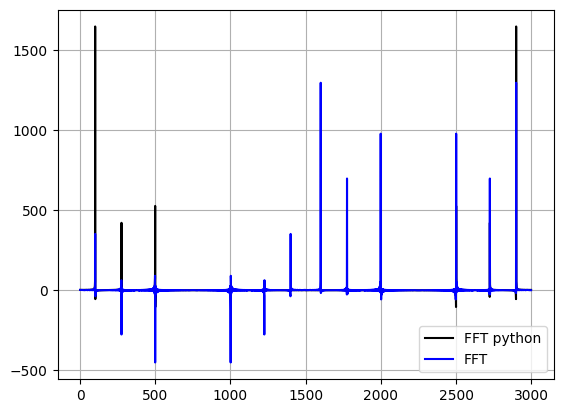

In [70]:
x=sp.symbols('x')
f=sp.sin(20*2*np.pi*x)+sp.cos(20*2*np.pi*x)+sp.sin(55*2*np.pi*x)+sp.cos(500*2*np.pi*x)+sp.sin(500*2*np.pi*x)
f1=sp.lambdify(x,f)
t=np.linspace(0,5,3000)
ys=f1(t)
M3=FFT(ys)


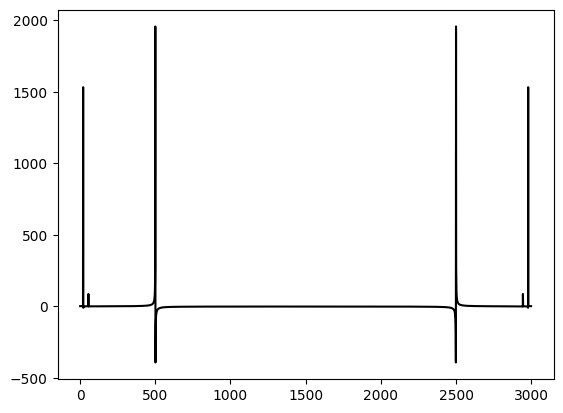

In [69]:
plt.plot(np.real(fft(ys)),color='black')

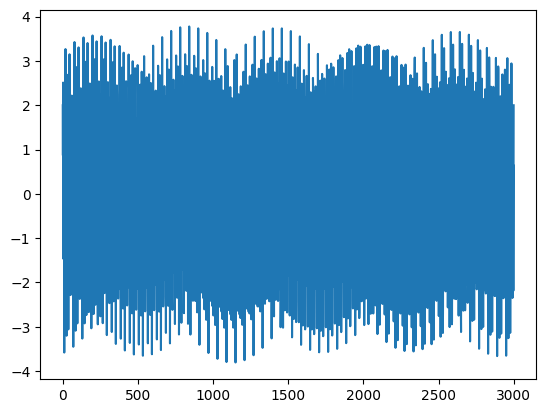

In [7]:
plt.plot(ys)

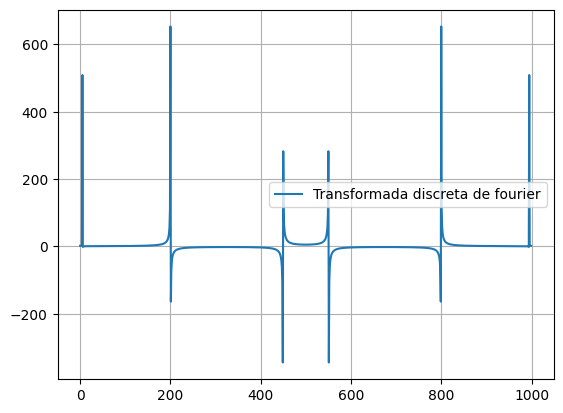

In [46]:
DFT(ys)